In [6]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import string

In [7]:
medium_data = pd.read_csv("./Data/medium_data.csv")

In [8]:
medium_data

,Unnamed: 0,Total Index,Venue Index,Name,Rating,Date,Review,Tokenized Text,Cleaned Text
0,0,0,0,Ellis,positive,3 years ago,"it was a bit quite when we went in, but don’t ...","['it was a bit quite when we went in, but don’...","['bit', 'quite', 'went', 'dont', 'let', 'fool'..."
1,1,1,1,Ellis,positive,2 years ago,nice cozy place which serves very tasty burger...,['nice cozy place which serves very tasty burg...,"['nice', 'cozy', 'place', 'serves', 'tasty', '..."
2,2,2,2,Ellis,positive,3 years ago,really nice place. one of my favourite burger ...,"['really nice place.', 'one of my favourite bu...","['really', 'nice', 'place', 'one', 'favourite'..."
3,3,3,3,Ellis,negative,3 years ago,the service was quite good but the burgers we ...,['the service was quite good but the burgers w...,"['service', 'quite', 'good', 'burgers', 'order..."
4,4,4,4,Ellis,positive,2 years ago,i had a very nice experience! the staff were r...,"['i had a very nice experience!', 'the staff w...","['nice', 'experience', 'staff', 'really', 'nic..."
...,...,...,...,...,...,...,...,...,...
403838,403838,577234,634,Amstelhoeck,positive,2 years ago,in a word super,[' in a word super'],"['word', 'super']"
403839,403839,577235,635,Amstelhoeck,neutral,3 years ago,recommended,[' recommended'],['recommended']
403840,403840,577236,636,Amstelhoeck,positive,4 years ago,location location location,[' location location location'],"['location', 'location', 'location']"
403841,403841,577237,637,Amstelhoeck,neutral,4 years ago,nice moment,[' nice moment'],"['nice', 'moment']"


In [9]:
data_words = medium_data["Cleaned Text"]
data_words

0         ['bit', 'quite', 'went', 'dont', 'let', 'fool'...
1         ['nice', 'cozy', 'place', 'serves', 'tasty', '...
2         ['really', 'nice', 'place', 'one', 'favourite'...
3         ['service', 'quite', 'good', 'burgers', 'order...
4         ['nice', 'experience', 'staff', 'really', 'nic...
                                ...                        
403838                                    ['word', 'super']
403839                                      ['recommended']
403840                 ['location', 'location', 'location']
403841                                   ['nice', 'moment']
403842                                             ['cozy']
Name: Cleaned Text, Length: 403843, dtype: object

In [10]:
# Load the regular expression library
import re
# Remove punctuation
medium_data['text_processed'] = \
medium_data['Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
medium_data['text_processed'] = \
medium_data['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
medium_data['text_processed'].head()

0    it was a bit quite when we went in but don’t l...
1    nice cozy place which serves very tasty burger...
2    really nice place one of my favourite burger j...
3    the service was quite good but the burgers we ...
4    i had a very nice experience the staff were re...
Name: text_processed, dtype: object

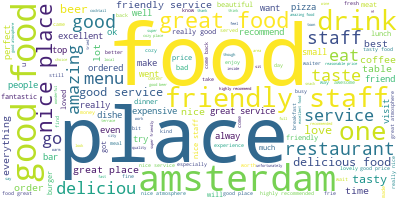

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(medium_data['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = medium_data.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LizzyDRB/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['bit', 'quite', 'went', 'let', 'fool', 'ever', 'case', 'little', 'place', 'cozily', 'busy', 'rightfully', 'burgers', 'nachos', 'lovely', 'staff', 'would', 'definitely', 'recommend', 'place', 'around', 'need', 'good', 'burger']


In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


In [14]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.192*"delicious" + 0.098*"tasty" + 0.065*"food" + 0.047*"top" + '
  '0.041*"super" + 0.038*"service" + 0.027*"friendly" + 0.023*"eaten" + '
  '0.020*"nice" + 0.019*"recommended"'),
 (1,
  '0.051*"place" + 0.037*"perfect" + 0.023*"amazing" + 0.019*"wonderful" + '
  '0.019*"amsterdam" + 0.014*"see" + 0.012*"ramen" + 0.011*"make" + '
  '0.011*"great" + 0.009*"stop"'),
 (2,
  '0.070*"staff" + 0.058*"friendly" + 0.039*"special" + 0.032*"burgers" + '
  '0.028*"fantastic" + 0.028*"pancakes" + 0.022*"nice" + 0.020*"dutch" + '
  '0.019*"nothing" + 0.018*"tasty"'),
 (3,
  '0.073*"love" + 0.046*"place" + 0.043*"vegan" + 0.027*"options" + '
  '0.025*"fun" + 0.021*"always" + 0.017*"vegetarian" + 0.017*"every" + '
  '0.017*"food" + 0.016*"favorite"'),
 (4,
  '0.149*"nice" + 0.087*"place" + 0.052*"good" + 0.043*"cozy" + 0.036*"great" '
  '+ 0.035*"beer" + 0.034*"atmosphere" + 0.025*"staff" + 0.022*"music" + '
  '0.019*"friendly"'),
 (5,
  '0.047*"experience" + 0.020*"staff" + 0.017*"really" 

In [21]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

ModuleNotFoundError: No module named 'pyLDAvis'

In [4]:
import pandas as pd
import numpy as np
import guidedlda as glda

from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import string

ModuleNotFoundError: No module named 'guidedlda'